Name - Timothy Yap

Student ID - 21611367

Code for part 1) c)

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

A = np.array([[3, 6.01], [2, 4]])

confroA = np.linalg.cond(A, 'fro')
con1A = np.linalg.cond(A, 1)

print("Condition number of A using the Frobenius-norm is: ", confroA)
print("Condition number of A using the 1-norm is: ", con1A)

Condition number of A using the Frobenius-norm is:  3256.005000000178
Condition number of A using the 1-norm is:  4509.505000000247


As the condition number is much larger than 1 in both norms, the matrix is ill-conditioned.

(Not asked in question but I wanted to show example anyways)

Below highlights how small pertubations in the input data changes the condition number by a significant amount.
Each entry changed by $\pm$ 0.001 and condition number is calculated.

In [2]:
for i in range(2):
    for j in range(2):
        for k in range(0, 3, 2):
            tempA = np.array([[3, 6.01], [2, 4]])
            tempA[i][j] = round(tempA[i][j] + (k * 0.001) - 0.001, 3)
            print("Condition number of \n", tempA)
            Afro = np.linalg.cond(tempA, 'fro')
            Aone = np.linalg.cond(tempA, 1)
            AfroDiff = np.abs(Afro - confroA)
            AoneDiff = np.abs(Aone - con1A)
            print("using the F-norm is", round(Afro, 5), ", a", round(AfroDiff, 5), "difference")
            print("using the 1-norm is", round(Aone, 5), ", a", round(AoneDiff, 5), "difference")
            print()

Condition number of 
 [[2.999 6.01 ]
 [2.    4.   ]]
using the F-norm is 2713.08754 , a 542.91746 difference
using the 1-norm is 3757.50375 , a 752.00125 difference

Condition number of 
 [[3.001 6.01 ]
 [2.    4.   ]]
using the F-norm is 4070.38131 , a 814.37631 difference
using the 1-norm is 5637.50687 , a 1128.00187 difference

Condition number of 
 [[3.    6.009]
 [2.    4.   ]]
using the F-norm is 3617.11561 , a 361.11061 difference
using the 1-norm is 5009.5045 , a 499.9995 difference

Condition number of 
 [[3.    6.011]
 [2.    4.   ]]
using the F-norm is 2960.55095 , a 295.45405 difference
using the 1-norm is 4100.41459 , a 409.09041 difference

Condition number of 
 [[3.    6.01 ]
 [1.999 4.   ]]
using the F-norm is 4654.4747 , a 1398.4697 difference
using the 1-norm is 6446.75482 , a 1937.24982 difference

Condition number of 
 [[3.    6.01 ]
 [2.001 4.   ]]
using the F-norm is 2503.81011 , a 752.19489 difference
using the 1-norm is 3467.51634 , a 1041.98866 difference

Cond

Code for Question 2

In [3]:
# 2) a) LU Factorization

A = np.array([[1, -0.55], [-2, 1.06]])
b = np.array([[1], [-1]])

# Obtaining the LU factorization
P, L, U = scipy.linalg.lu(A)

# Solving by LUx = b
y = scipy.linalg.solve(L, np.dot(P, b))
x = scipy.linalg.solve(U, y)

print("The LU factorisation is: \nL = \n", L, "\nand U = \n", U)
print("\nThe solution vector is\n", x)

The LU factorisation is: 
L = 
 [[ 1.   0. ]
 [-0.5  1. ]] 
and U = 
 [[-2.    1.06]
 [ 0.   -0.02]]

The solution vector is
 [[-12.75]
 [-25.  ]]


In [4]:
# 2) b) Condition Number

conA = np.linalg.cond(A)

print("The condition number of martix A is", conA)


The condition number of martix A is 160.64627514356465


2 ) b) As the condition number is larger than 1, the matrix is ill-conditioned. Therefore a small a perturbation in input data results in signifcant changes to the solution. Therefore the errors will be large.

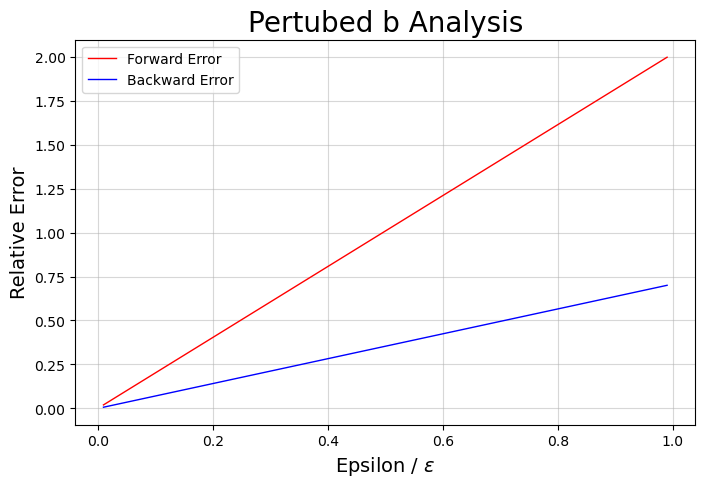

In [5]:
# 2) c) Perturbed b Analysis

A = np.array([[1, -0.55], [-2, 1.06]])
b = np.array([[1], [-1]])
n = 101
fx = scipy.linalg.solve(A, b)

# Don't consider 0 or 1
temp = np.linspace(0, 1, n)
epArr = temp[1:-1]

# Initialise array for plot
backErr = []
forwErr = []


# Calculating error for each espilon
for ep in epArr:
    # Forward Error
    bPrime = np.array([[1 + ep], [-1]])
    xPrime = scipy.linalg.solve(A, bPrime)
    tempForwErr = np.linalg.norm(xPrime - fx) / np.linalg.norm(fx)
    forwErr.append(tempForwErr)
    
    # Backward Error
    tempBackErr = np.linalg.norm(ep) / np.linalg.norm(b)
    backErr.append(tempBackErr)


# Plotting graph
plt.figure(figsize=(8,5))
plt.plot(epArr, forwErr, "r-", lw = 1, label = "Forward Error")
plt.plot(epArr, backErr, "b-", lw = 1, label = "Backward Error")


# Graph settings
plt.title("Pertubed b Analysis", fontsize=20)
plt.xlabel("Epsilon / $\epsilon$", fontsize=14)
plt.ylabel("Relative Error", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

2 ) c) The relation seems to be linear as when epsilon increases, so does both backward and forward errors increase. It can also be observed that the forward error grows more than twice as fast as the backward error.

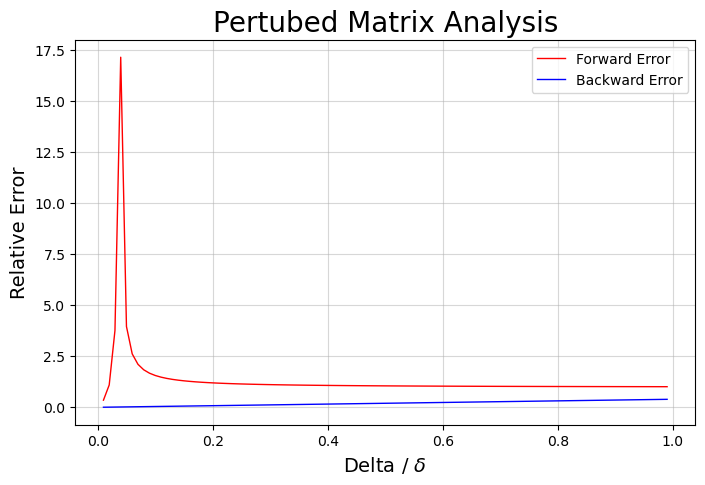

In [6]:
# 2) d) Perturbed Matrix Analysis

A = np.array([[1, -0.55], [-2, 1.06]])
b = np.array([[1], [-1]])
n = 101
fx = scipy.linalg.solve(A, b)

# Don't consider 0 or 1
temp = np.linspace(0, 1, n)
delArr = temp[1:-1]

# Initialise array for plot
backErr = []
forwErr = []


# Calculating error for each espilon
for delta in delArr:
    # Forward Error
    APrime = np.array([[1 + delta, -0.55], [-2, 1.06]])
    xPrime = scipy.linalg.solve(APrime, b)
    tempForwErr = np.linalg.norm(xPrime - fx) / np.linalg.norm(fx)
    forwErr.append(tempForwErr)
    
    # Backward Error
    tempBackErr = np.linalg.norm(delta) / np.linalg.norm(A)
    backErr.append(tempBackErr)


# Plotting graph
plt.figure(figsize=(8,5))
plt.plot(delArr, forwErr, "r-", lw = 1, label = "Forward Error")
plt.plot(delArr, backErr, "b-", lw = 1, label = "Backward Error")


# Graph settings
plt.title("Pertubed Matrix Analysis", fontsize=20)
plt.xlabel("Delta / $\delta$", fontsize=14)
plt.ylabel("Relative Error", fontsize=14)
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()

2 ) d) Similarly to 2) c), the backward error is linear, however, the forward error has a noticeable peak at around $\delta = 0.05$ and with more data points for delta, such as changing n in the code to a higher number, the relative error can be much larger than 17 as shown in the graph. Between 0 and 0.05 the forward error increases exponentially, and decreases after ~0.5 to where it hovers around a relative error of 1 past delta = 0.2.